In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [21]:
df = pd.read_csv('train.csv')

        Survived
Sex             
female       233
male         109


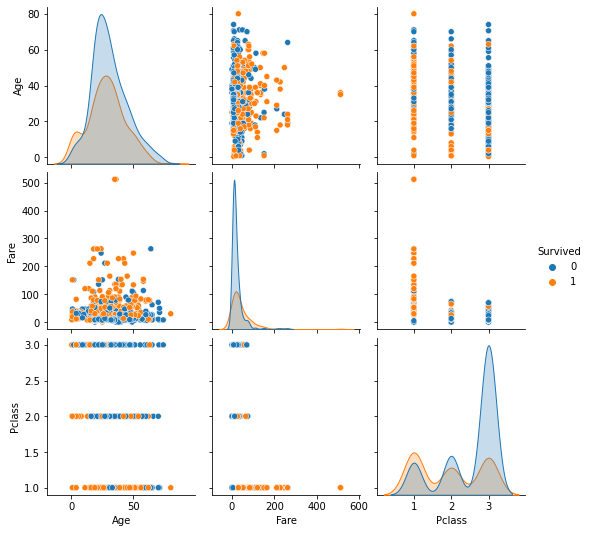

In [22]:
#Exploratory Analys
print(df[['Survived', 'Sex']].groupby(['Sex']).sum())
df_prim = df[['Age', 'Sex', 'Fare', 'Pclass', 'Survived']]
sns.pairplot(data = df_prim, hue = 'Survived')
plt.show()

In [23]:
X_test = pd.read_csv('test.csv')

In [24]:
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #check with stratify

In [25]:
X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True) #Check filling with other method for example KNN
#X_train['Embarked'].replace(np.nan, 'S', inplace=True)
X_train.drop('Cabin', axis=1, inplace=True) # Too many NA
X_train.drop('Ticket', axis=1, inplace=True)
X_train.drop('Embarked', axis=1, inplace=True) #Maybe one hot encoder this later
X_train.drop('Name', axis=1, inplace=True)
X_train['Sex'].replace('male', 1, inplace=True)
X_train['Sex'].replace('female', 0, inplace=True)


In [26]:
X_test.drop('Cabin', axis=1, inplace=True) # Too many NA
X_test.drop('Ticket', axis=1, inplace=True)
X_test.drop('Embarked', axis=1, inplace=True) #Maybe one hot encoder this
X_test.drop('Name', axis=1, inplace=True)
X_test['Sex'].replace('male', 1, inplace=True)
X_test['Sex'].replace('female', 0, inplace=True)
X_test['Age'].fillna(value=X_test['Age'].mean(), inplace=True) #Check filling with other method for example KNN


In [27]:
X_test
X_test['Fare'].replace(np.nan, '7', inplace=True)
#X_test[X_test['Fare'].isna()]

In [ ]:
X_train
clf = KNeighborsClassifier(n_neighbors=4)
pred = clf.fit(X_train, y_train)
y_pred = pred.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
#X_train, y_train = make_classification(n_samples=1000, n_features=7, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf2 = RandomForestClassifier(max_depth=9, random_state=0)
pred2 = clf2.fit(X_train, y_train)
y_pred2 = pred2.predict(X_test)
#accuracy_score(y_test, y_pred2)
print(y_pred2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(random_state=0)
pred3 = clf3.fit(X_train, y_train)
y_pred3 = pred3.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(y_pred)
print(X_test['PassengerId'])
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = X_test['PassengerId']
submission_df['Survived'] = y_pred2
submission_df.to_csv('submissions.csv', header=True, index=False)

In [ ]:
submission_df